# Your Uni : jc5635
# Your AI Model Share Username: jc5635
# Your Full name : John Cheng
# Link to your Public Github repository with Final report  : https://github.com/johnc2024/HW_1


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Share your models to a centralized leaderboard
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1.   Get data in and set up X_train / X_test / y_train
2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit model to competition
5. Repeat submission process to improve place on leaderboard



In [2]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.8/975.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.3/96.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.5/298.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.4/178.4 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.0/147.0 kB 2.6 MB/

## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [3]:
# Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [186]:
# Load data
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv') ## Load test features to predict on
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv') ## Load y train (true labels)
y_train_labels = y_train.idxmax(axis = 1) ## Examine what this does and write in next cell

X_train.head()

Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# For each row in y_train, the column name with the highest value (i.e. 1) is returned upon calling .idxmax(axis=1);
# the rows and corresponding names are collectively stored in y_train_labels.

# y_train contains the raw response data (88 x 5) from the training dataset, represented as a series of dummy variables that each
# indicate one of the five values that the response can take on (e.g. "Low"), imported from world_happiness_competition_data.zip.
# y_train_labels is a reformatted version of the response data from the training dataset, such that the response is now
# defined as a single column of nominal values (88 x 1).

dtype('O')

##  Add new data

In [104]:
# Truncated and cleaned up region data to merge (Week 4 folder)
countrydata = pd.read_csv("newcountryvars.csv")

countrydata.head()

country_name  population  population_below_poverty_line       hdi  \
0        India  1339180127                           21.9  0.623559   
1      Nigeria   190886311                           70.0  0.527105   
2       Mexico   129163276                           46.2  0.761683   
3     Pakistan   197015955                           29.5  0.550354   
4   Bangladesh   164669751                           31.5  0.578824   

   life_expectancy  expected_years_of_schooling  mean_years_of_schooling  \
0           68.322                    11.696590                 6.298834   
1           53.057                     9.970482                 6.000000   
2           76.972                    13.299090                 8.554985   
3           66.365                     8.106910                 5.089460   
4           71.985                    10.178706                 5.241577   

            gni  
0   5663.474799  
1   5442.901264  
2  16383.106680  
3   5031.173074  
4   3341.490722

In [105]:
# Standardize "country_name" values in countrydata with "Country or region" values in X_train and X_test before merging
countrydata.at[81, "country_name"] = "Congo (Brazzaville)"
countrydata.at[5, "country_name"] = "Congo (Kinshasa)"
countrydata.at[130, "country_name"] = "North Macedonia"
countrydata.at[172, "country_name"] = "Palestinian Territories"
countrydata.at[141, "country_name"] = "Trinidad & Tobago"
countrydata.at[32, "country_name"] = "Vietnam"

# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.
X_train = X_train.merge(countrydata, left_on = "Country or region", right_on = "country_name", how = "left")
X_test = X_test.merge(countrydata, left_on = "Country or region", right_on = "country_name", how = "left")

# Remove and rename columns as needed
def clean_X(post_merge_data):
    post_merge_data.drop(columns = ["Country or region", "name"], inplace = True)
    post_merge_data.rename(columns = {"GDP per capita":"gdp_per_cap",
                           "Social support":"social_support",
                           "Healthy life expectancy":"healthy_life_exp",
                           "Freedom to make life choices":"freedom_choices",
                           "Generosity":"generosity",
                           "Perceptions of corruption":"perceptions_corrupt",
                           "sub-region":"sub_region",
                           "Terrorist_attacks":"terrorist_attacks"}, inplace = True)

clean_X(X_train)
clean_X(X_test)

In [ ]:
X_train.head()

gdp_per_cap  social_support  healthy_life_exp  freedom_choices  generosity  \
0        0.960           1.274             0.854            0.455       0.083   
1        0.694           1.325             0.835            0.435       0.200   
2        1.181           1.156             0.999            0.067       0.000   
3        1.684           1.313             0.871            0.555       0.220   
4        0.745           1.529             0.756            0.631       0.322   

   perceptions_corrupt    region                       sub_region  \
0                0.027  Americas  Latin America and the Caribbean   
1                0.127  Americas  Latin America and the Caribbean   
2                0.034    Europe                  Southern Europe   
3                0.167      Asia                     Western Asia   
4                0.240      Asia                     Central Asia   

   terrorist_attacks country_name  population  population_below_poverty_line  \
0          18.000000         Peru  32165485.0                           22.7   
1         125.611111    Nicaragua   6217581.0                           29.6   
2         112.000000       Greece  11159773.0                           36.0   
3          57.333333        Qatar   2639211.0                            NaN   
4         125.611111   Uzbekistan  31910641.0                           14.0   

        hdi  life_expectancy  expected_years_of_schooling  \
0  0.739749           74.814                     13.38634   
1  0.645203           75.212                     11.67000   
2  0.865873           81.071                     17.21752   
3  0.855531           78.323                     13.40610   
4  0.700668           69.400                     12.16651   

   mean_years_of_schooling            gni  
0                 9.013470   11294.840330  
1                 6.544000    4746.699464  
2                10.539460   24807.535890  
3                 9.764630  129915.600900  
4                12.048045    5748.226043

In [ ]:
# We conduct some initial data tidying above (i.e. standardizing country names pre-merge, subsetting and renaming columns post-merge), which will simplify
# the work of automated data preprocessing via ColumnTransformer later in step 2.

# EDA

In [7]:
print(X_train.dtypes)

gdp_per_cap                      float64
social_support                   float64
healthy_life_exp                 float64
freedom_choices                  float64
generosity                       float64
perceptions_corrupt              float64
region                            object
sub_region                        object
terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
# Displayed above are the numeric (i.e. float64) and categorical (i.e. object) datatypes for each of the columns
# in the expanded X_train dataset.

Find out the number and percentage of missing values in the table per column

In [8]:
X_train.isnull().sum()

gdp_per_cap                       0
social_support                    0
healthy_life_exp                  0
freedom_choices                   0
generosity                        0
perceptions_corrupt               0
region                            0
sub_region                        0
terrorist_attacks                 0
country_name                      1
population                        1
population_below_poverty_line    11
hdi                               1
life_expectancy                   2
expected_years_of_schooling       2
mean_years_of_schooling           2
gni                               2
dtype: int64

In [9]:
X_train.isnull().sum() / len(X_train) * 100

gdp_per_cap                       0.000000
social_support                    0.000000
healthy_life_exp                  0.000000
freedom_choices                   0.000000
generosity                        0.000000
perceptions_corrupt               0.000000
region                            0.000000
sub_region                        0.000000
terrorist_attacks                 0.000000
country_name                      1.136364
population                        1.136364
population_below_poverty_line    12.500000
hdi                               1.136364
life_expectancy                   2.272727
expected_years_of_schooling       2.272727
mean_years_of_schooling           2.272727
gni                               2.272727
dtype: float64

Plot the frequency distribution / histogram of some of the numerical features that you think are important

array([[<Axes: title={'center': 'mean_years_of_schooling'}>]],
      dtype=object)

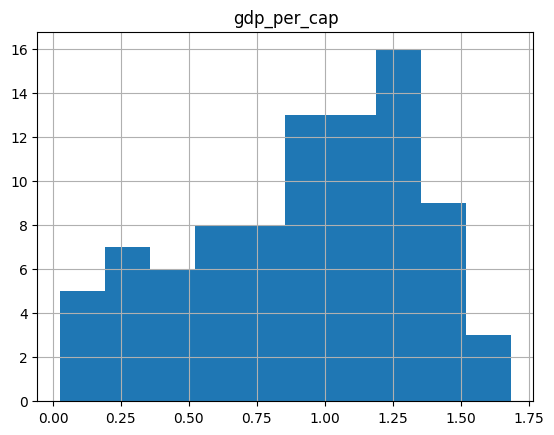

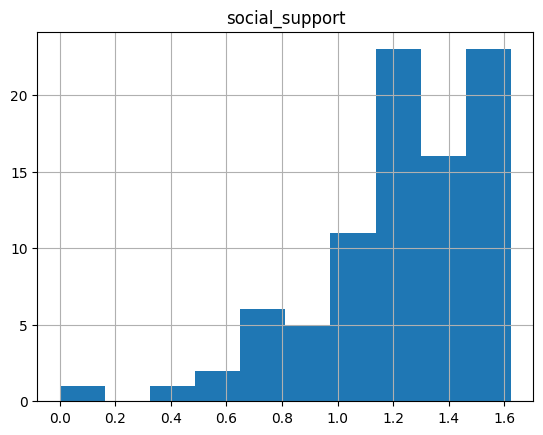

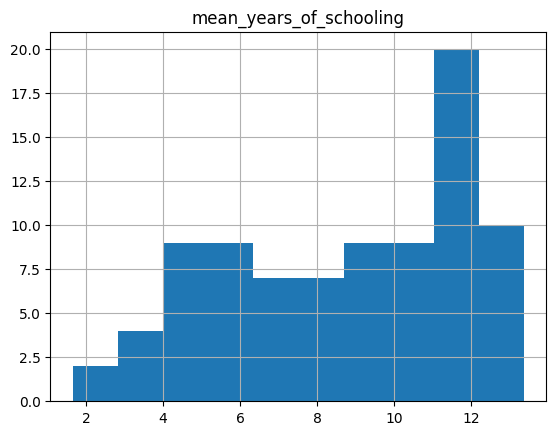

In [10]:
X_train.hist("gdp_per_cap")
X_train.hist("social_support")
X_train.hist("mean_years_of_schooling")

Plot the categorical variables and their distribution

<Axes: >

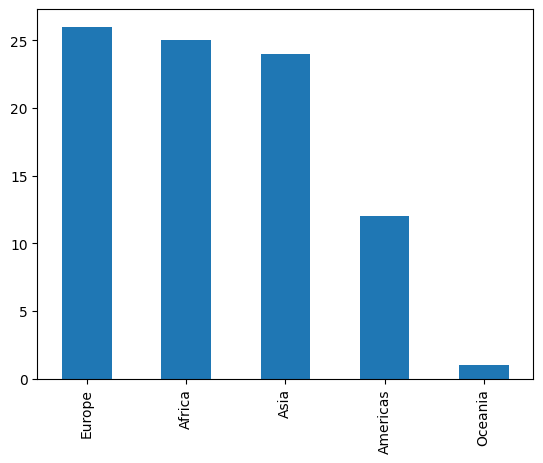

In [11]:
X_train.region.value_counts().plot(kind = "bar")

<Axes: >

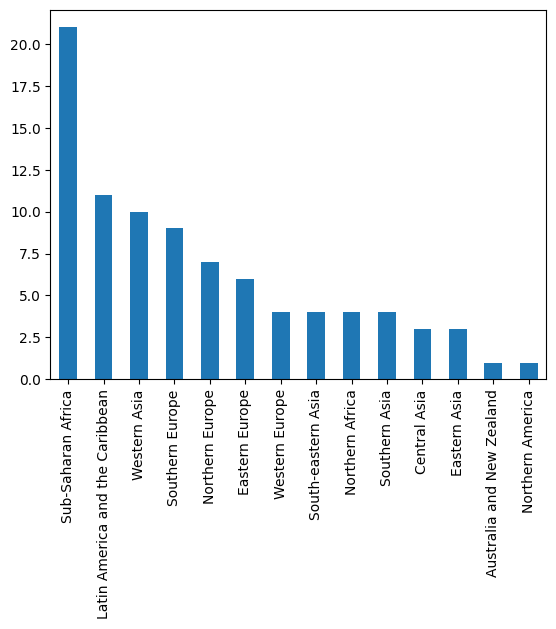

In [12]:
X_train.sub_region.value_counts().plot(kind = "bar")

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [13]:
X_train.corr(method = "pearson", numeric_only = True).style.background_gradient()

Write what you observed and your General comments on what should be done:

In [ ]:
# Missing values are observed on each of the features merged from newcountryvars.csv, and non-normality is observed in continuous features of interest
# (e.g. social support). The next step is to use ColumnTransformer to impute missing values and normalize data prior to model fitting.

##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [106]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [107]:
# Preprocess X_train

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(exclude = "object") ## Drop all the non-numerical features from X_train
numeric_features = numeric_features.columns.tolist()

# categorical_features = X_train[["region", "sub_region", "country_name"]]
# categorical_features = categorical_features.columns.tolist()

numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy = "mean")),
    ("scaler", StandardScaler())])

# Replacing missing values with modal value and then one hot encoding.
# categorical_transformer = Pipeline(steps = [
#    ("imputer", SimpleImputer(strategy = "most_frequent")),
#    ("onehot", OneHotEncoder(handle_unknown = "ignore"))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features) #,
        # ("cat", categorical_transformer, categorical_features)
        ])

# Fit your preprocessor object
preprocess = preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
# Data preprocessing is a important step for ensuring that our prediction models are valid. We preprocess X_train by: (1) defining numeric_features of
# interest, (2) defining data transformation instructions in numeric_transformer, (3) defining a preprocessor object that applies the ColumnTransformer
# function using the objects above, (4) applying the preprocessor object to X_train.

# StandardScaler is applied to normalize numeric features, as this allows for adequate performance of prediction algorithms that expect normality.
# We change the imputation method from constant = 0 to mean imputation for missing numeric values; it is preferable to use a measure of central tendency,
# as it is unclear that missing values are true zeroes. As an aside - there would be more missingness if country names had not been standardized in step 1.

# Note regarding categorical fields: Since region, sub_region, and country_name are not expected to be meaningful predictors, these should be dropped
# in the preprocessor function below -- and since these constitute the remaining categorical variables, it is not necessary in this case to define
# categorical_features and categorical_transformer objects in our preprocessing pipeline.

# However, if these categorical features were useful, they might be preprocessed by setting the imputation method as modal, and handle_unknown as
# "ignore" in OneHotEncoder; only one value (i.e. "North Cyprus") on one categorical feature (i.e. country_name) would have been missing. Calling
# columns.tolist() on categorical_features would also be needed for the proper functioning of the preprocessing pipeline.

In [108]:
# Write function to transform data with preprocessor
def preprocessor(data):
    data.drop(columns = ["region", "sub_region", "country_name"], inplace = True) # drop country_name as well; not a predictor per se
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
# The preprocessor object uses ColumnTransformer to clean features via numeric_transformer (and, if it were needed, categorical_transformer) object(s).
# The preprocess object fits the instructions from the preprocessor object to X_train.
# The preprocessor function implements the data transformations from the preprocess object.
# Preprocessed data is the output (i.e. transformed data) returned from the preprocessor function.

In [109]:
# check shape of X data after preprocessing it using our new function
X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed.shape

(88, 14)

##3. Fit model on preprocessed data and save preprocessor function and model


In [110]:
from sklearn.ensemble import RandomForestClassifier

## Define a Random Forest Model here, fit it, and score it
rf = RandomForestClassifier(max_depth = 4, n_estimators = 30, random_state = 1)
rf_fit = rf.fit(X_train_preprocessed, y_train_labels)

# Your cell should have a score between 0-1 as output
rf.score(X_train_preprocessed, y_train_labels)

0.9090909090909091

#### Save preprocessor function to local "preprocessor.zip" file

In [111]:
! pip install pyspark

import aimodelshare as ai
ai.export_preprocessor(preprocessor, "")

Your preprocessor is now saved to 'preprocessor.zip'


#### Save model to local ".onnx" file

In [116]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there
from skl2onnx.common.data_types import FloatTensorType

feature_count = X_train_preprocessed.shape[1] # Get count of preprocessed features (i.e. 14)
initial_type = [("float_input", FloatTensorType([None, feature_count]))]

onnx_model = model_to_onnx(rf, framework = "sklearn",
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open("onnx_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

## 4. Generate predictions from X_test data and submit model to competition


In [29]:
# Set credentials using modelshare.org username/password
from aimodelshare.aws import set_credentials

# This is the unique rest api that powers this World Happiness Classification Playground
## Do not change this
apiurl = "https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl = apiurl)

Modelshare.ai Username:··········
Modelshare.ai Password:··········
Modelshare.ai login credentials set successfully.


In [113]:
# Instantiate Competition
import aimodelshare as ai
mycompetition = ai.Competition(apiurl)

In [114]:
# preprocess X_test
X_test_preprocessed = preprocessor(X_test)

In [118]:
# Submit Model 1:

#-- Generate predicted values (Model 1)
prediction_labels = rf_fit.predict(X_test_preprocessed)

model_filepath_1 = "onnx_model.onnx"
preprocessor_filepath = "preprocessor.zip"

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath_1,
                           preprocessor = preprocessor,
                           prediction_submission = prediction_labels)

Your preprocessor is now saved to 'preprocessor.zip'


KeyboardInterrupt: Interrupted by user

In [162]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

## 5. Repeat submission process to improve place on leaderboard


In [74]:
# Train and submit model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).

## Make a new model with changed parameters to improve the score
rf_2 = RandomForestClassifier(max_depth = 5, n_estimators = 30, random_state = 1)
rf_fit_2 = rf_2.fit(X_train_preprocessed, y_train_labels)

rf_2.score(X_train_preprocessed, y_train_labels)

0.9886363636363636

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
# The max_depth parameter, which controls the tree depth (i.e. complexity) of RandomForestClassifier, is updated from 3 to 5. A higher tree depth value
# effectively indicates a greater number of trees, which allows the ensemble random forest model to fit the data more closely.

In [120]:
# Save sklearn model to local ONNX file
onnx_model_2 = model_to_onnx(rf_2, framework = "sklearn",
                             initial_types = initial_type,
                             transfer_learning = False,
                             deep_learning = False)

# Serialize your model to save it as an onnx file
with open("onnx_model_2.onnx", "wb") as f:
    f.write(onnx_model_2.SerializeToString())

In [121]:
#Submit Model 2:

#-- Generate predicted y values (Model 2)
prediction_labels_2 = rf_fit_2.predict(X_test_preprocessed)
model_filepath_2 = "onnx_model_2.onnx"

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath_2,
                           preprocessor = preprocessor,
                           prediction_submission = prediction_labels_2)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): RF2
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1139

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [122]:
# Compare two or more models
data = mycompetition.compare_models([2, 3], verbose = 1)
mycompetition.stylize_compare(data)

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## We should instead use cross-validation to systematically determine the optimal parameters, as opposed to ad hoc approaches.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {"max_depth": np.arange(2, 20)} # Use np.arange to create a sequence of numbers for each parameter's space you think should be searched

rf_cv = RandomForestClassifier(n_estimators = 30, random_state = 1)

gridmodel = GridSearchCV(rf_cv, param_grid) # Read GridSearchCV docs and create an object with RandomForestClassifier as the model

rf_cv_fit = gridmodel.fit(X_train_preprocessed, y_train_labels)

# use model methods to fit score and predict model:
gridmodel.score(X_train_preprocessed, y_train_labels)

In [140]:
# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.659
best parameters: {'max_depth': 8}


In [142]:
# Save sklearn model to local ONNX file
onnx_model_3 = model_to_onnx(gridmodel, framework = "sklearn",
                          initial_types = initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open("onnx_model_3.onnx", "wb") as f:
    f.write(onnx_model_3.SerializeToString())

In [146]:
#Submit Model 3:

#-- Generate predicted values
prediction_labels_3 = rf_cv_fit.predict(X_test_preprocessed)
model_filepath_3 = "onnx_model_3.onnx"

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model = model_filepath_3,
                           prediction_submission = prediction_labels_3,
                           preprocessor = preprocessor)

Your preprocessor is now saved to 'preprocessor.zip'
Insert search tags to help users find your model (optional): RF3
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 1140

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.ai/detail/model:3164


In [167]:
# Get leaderboard
data = mycompetition.get_leaderboard()
mycompetition.stylize_leaderboard(data)

In [148]:
# Compare two or more models
data = mycompetition.compare_models([3, 4], verbose = 1)
mycompetition.stylize_compare(data)

In [193]:
# Fit GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 1, max_depth = 3, random_state = 1) ## Read documentations of imported models and fit them.
gbc_fit = gbc.fit(X_train_preprocessed, y_train_labels)

gbc_fit.score(X_train_preprocessed, y_train_labels)

# Save sklearn model to local ONNX file

onnx_model_4 = model_to_onnx(gbc, framework = "sklearn",
                          initial_types=initial_type,
                          transfer_learning = False,
                          deep_learning = False)

with open("onnx_model_4.onnx", "wb") as f:
    f.write(onnx_model_4.SerializeToString())

#-- Generate predicted values
prediction_labels = gbc_fit.predict(X_test_preprocessed)

model_filepath_4 = "onnx_model_4.onnx"

# Submit model to Competition Leaderboard
mycompetition.submit_model(model = model_filepath_4,
                                 prediction_submission = prediction_labels,
                                 preprocessor = preprocessor_filepath)


1.0

Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
# The number of boosting stages (i.e. n_estimators) and maximum depth (i.e. max_depth) both contribute to the performance of the GBC, as expected.

# 6. Basic Deep Learning

In [192]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.preprocessing import LabelBinarizer

# feature_count = X_train_preprocessed.shape[1] # Get count of preprocessed features (i.e. 14)
initial_type = [("float_input", FloatTensorType([None, feature_count]))]

keras_model = Sequential([Dense(128), Activation("relu"),
                          Dense(64), Activation("relu"),
                          Dense(64), Activation("relu"),
                          Dense(32), Activation("relu"),
                          Dense(5), Activation("softmax")
                          ]) ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)


# Use Softmax activation in last layer. How many neurons should there be in the last layer?
# 5 layers for 5 class labels

# Compile model
keras_model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

y_train_transformed = LabelBinarizer().fit_transform(y_train_labels)

# Fitting the NN to the Training set
keras_model.fit(X_train_preprocessed,
                y_train_transformed, ## Note that keras models require a one-hot-encoded y_train object
                batch_size = 20,
                epochs = 300, validation_split = 0.25)

Epoch 1/300
4/4 [==============================] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
# We use softmax activation in the last layer as it allows for ease of interpretation, i.e. as a probability.

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked

In [ ]:
# We implemented random forest (arbitrary parameters), random forest (parameters selected via CV), and gradient boosting classifers, among others.
# Our gradient boosting model achieves a prediction score of 100% on the training data; however, this may be indicative of overfitting.
# Test data should be used to evaluate the performance of a selected model - this requires both X_test and y_test datasets.